In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/matteosan1/finance_course/develop/Projects/proj8.csv', index_col = 'Date')
print(df.head())

                   AAP       ABMD        AOS        APA        ATO       CBOE  \
Date                                                                            
2014-03-27  120.386787  25.770000  20.311985  70.738632  38.335091  53.106892   
2014-03-28  121.125298  25.700001  20.594727  71.548737  38.443562  52.420502   
2014-03-31  122.922981  26.040001  20.653065  71.488411  39.328094  53.219734   
2014-04-01  123.651749  26.200001  20.810135  72.186493  39.169537  52.956448   
2014-04-02  123.272804  26.000000  21.007603  72.591560  39.553406  51.950348   

                 Brent        COP        CVX        DVA  ...        NOV  \
Date                                                     ...              
2014-03-27  101.279999  55.201248  84.980484  68.389999  ...  61.768215   
2014-03-28  101.669998  56.045704  85.579918  68.449997  ...  63.100582   
2014-03-31  101.580002  56.045704  85.875999  68.849998  ...  63.263077   
2014-04-01   99.739998  56.013840  85.940994  69.339996  

In [3]:
series_data = df.copy()
cols = list(df.columns)
cols.remove("SP500")
cols.remove("Brent")
cols.remove("rf")
print (cols)

['AAP', 'ABMD', 'AOS', 'APA', 'ATO', 'CBOE', 'COP', 'CVX', 'DVA', 'DVN', 'ET', 'FFIV', 'FTI', 'HII', 'HSIC', 'IFF', 'IPGP', 'IRM', 'IVZ', 'JNPR', 'LNC', 'LPG', 'MOS', 'NCLH', 'NI', 'NOV', 'PRGO', 'PVH', 'QCOM', 'SEE', 'UNM', 'WU', 'XRAY']


In [4]:
series_data = df[cols]
series_d = series_data/series_data.iloc[0]

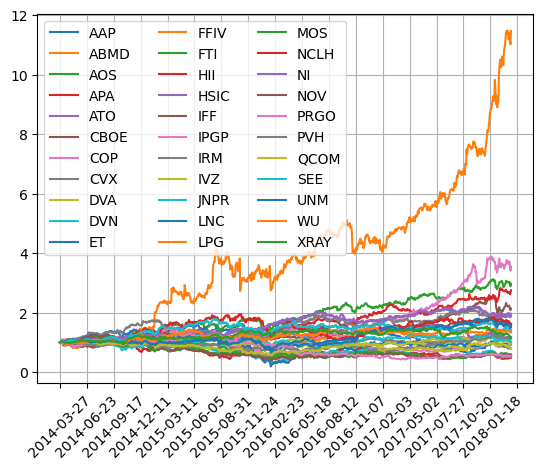

In [5]:
for i in series_d.columns:
  plt.plot(series_d[i], label = i)

plt.plot(figsize = (10, 20))

plt.gca().xaxis.set_major_locator(plt.MaxNLocator(20))
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(ncol = 3)

plt.show()

In [6]:
series_data = df[cols]
series_daily_returns = series_data.pct_change()
returns = series_daily_returns.mean()*252
returns.head()

AAP     0.032100
ABMD    0.701586
AOS     0.297326
APA    -0.103439
ATO     0.183844
dtype: float64

In [7]:
covariance = series_daily_returns.cov()*252
covariance.head()

,AAP,ABMD,AOS,APA,ATO,CBOE,COP,CVX,DVA,DVN,...,NCLH,NI,NOV,PRGO,PVH,QCOM,SEE,UNM,WU,XRAY
AAP,0.098084,0.017280,0.016855,0.019144,0.008550,0.008858,0.015659,0.016159,0.012262,0.016900,...,0.020964,0.008228,0.018711,0.017357,0.020190,0.011545,0.018720,0.019651,0.017864,0.011940
ABMD,0.017280,0.181520,0.024735,0.014437,0.006832,0.011588,0.008475,0.008756,0.016705,0.017713,...,0.025809,0.007656,0.009093,0.019200,0.019252,0.019830,0.021529,0.015414,0.024741,0.019413
AOS,0.016855,0.024735,0.049082,0.027216,0.008844,0.011003,0.025499,0.020052,0.013670,0.030657,...,0.023982,0.009953,0.022341,0.017798,0.023537,0.019663,0.022596,0.025466,0.020997,0.017567
APA,0.019144,0.014437,0.027216,0.152368,0.008237,0.001943,0.088082,0.056531,0.014989,0.124243,...,0.014954,0.011209,0.077781,0.025008,0.027499,0.025771,0.020268,0.036122,0.026226,0.013777
ATO,0.008550,0.006832,0.008844,0.008237,0.028103,0.003262,0.006970,0.008850,0.007442,0.010700,...,0.007723,0.023213,0.005874,0.005441,0.005808,0.006065,0.010094,0.003256,0.007384,0.007466


OPTIMIZATION

In [8]:
import numpy as np
from scipy.optimize import minimize

def sum_weights(w):
  return sum(w) - 1

def min_risk(w, covariance):
  return w.T.dot(covariance.dot(w))

def target_return(w, returns, target_return):
  return (returns.dot(w) - target_return)


t_returns = 0.32
num_assets = 33
constraints = ({'type': 'eq', 'fun': sum_weights},
               {'type': 'eq', 'fun': target_return, 'args' : (returns, t_returns)})
bounds = tuple((0, 1) for _ in range(num_assets))
weights = [1./num_assets for _ in range(num_assets)]
optimization = minimize(min_risk, weights, args=(covariance),
                        bounds = bounds, constraints = constraints)

print(optimization)
print("Expected portfolio return: {:.3f}".format(returns.dot(optimization.x)))

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.02123051609291572
       x: [ 2.285e-18  1.775e-01 ...  4.587e-18  9.175e-18]
     nit: 18
     jac: [ 2.457e-02  8.977e-02 ...  2.935e-02  2.414e-02]
    nfev: 612
    njev: 18
Expected portfolio return: 0.320


In [9]:
print("Optimal portfolio weights:", optimization.x)

Optimal portfolio weights: [2.28501569e-18 1.77495568e-01 1.27239156e-01 0.00000000e+00
 2.57062219e-01 2.07232443e-01 5.65968306e-18 1.81100877e-17
 1.65499042e-17 5.12382250e-18 1.41662400e-17 0.00000000e+00
 0.00000000e+00 9.65522536e-02 1.92442006e-18 3.21831634e-18
 8.33851121e-02 0.00000000e+00 7.49981008e-18 0.00000000e+00
 3.54300821e-19 1.67959369e-17 0.00000000e+00 1.17977540e-17
 5.10332492e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.01296573e-17 4.58738236e-18
 9.17547396e-18]


EFFICIENT FRONTIER

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def efficient_frontier(w, asset_returns, target_return):
  portfolio_return = asset_returns.dot(w)
  return (portfolio_return - target_return)

result = []
for target_return in np.arange(0.20, 0.45, 0.005):
    constraints = ({'type': 'eq', 'fun': efficient_frontier, 'args': (returns, target_return)},
                   {'type': 'eq', 'fun': sum_weights})
    weights = [1./num_assets for _ in range(num_assets)]
    optimization = minimize(min_risk, weights, args=(covariance), bounds=bounds, constraints=constraints)

    result.append(
        (np.sqrt(optimization.x.T.dot(covariance.dot(optimization.x))),
                  returns.dot(optimization.x)))

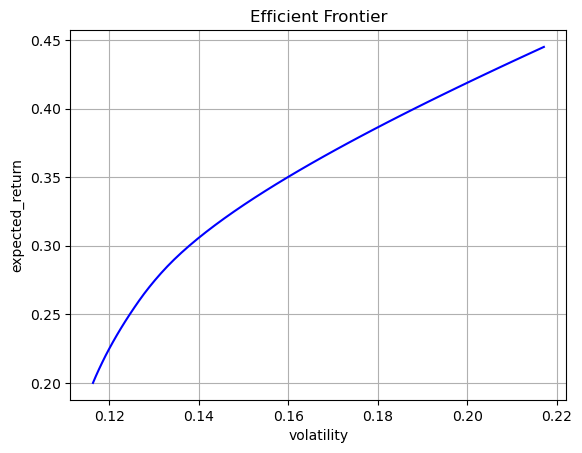

In [12]:
import matplotlib.pyplot as plt

expected_return = [x[0] for x in result]
volatility = [x[1] for x in result]

plt.plot(expected_return, volatility, color = 'blue')
plt.xlabel('volatility')
plt.ylabel('expected_return')
plt.title("Efficient Frontier")
plt.grid()

plt.show()

PORTFOLIO WITH RISK - FREE ASSET and CAPITAL ALLOCATION LINE (CAL)

In [13]:
data_rf = df.copy()
rf = data_rf[data_rf.columns[-1]]

print(rf)

Date
2014-03-27    0.00033
2014-03-28    0.00033
2014-03-31    0.00028
2014-04-01    0.00030
2014-04-02    0.00018
               ...   
2018-03-20    0.01758
2018-03-21    0.01710
2018-03-22    0.01683
2018-03-23    0.01688
2018-03-26    0.01705
Name: rf, Length: 1007, dtype: float64


In [14]:
rf_return = rf.mean()
print(rf_return)

0.0040709099998185


In [15]:

weights = [2.28501569e-18, 1.77495568e-01, 1.27239156e-01, 0.00000000e+00,
 2.57062219e-01, 2.07232443e-01, 5.65968306e-18, 1.81100877e-17,
 1.65499042e-17, 5.12382250e-18, 1.41662400e-17, 0.00000000e+00,
 0.00000000e+00, 9.65522536e-02, 1.92442006e-18, 3.21831634e-18,
 8.33851121e-02, 0.00000000e+00, 7.49981008e-18, 0.00000000e+00,
 3.54300821e-19, 1.67959369e-17, 0.00000000e+00, 1.17977540e-17,
 5.10332492e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
 0.00000000e+00, 0.00000000e+00, 2.01296573e-17, 4.58738236e-18,
 9.17547396e-18]

w = np.array(weights)

variance = w.T.dot(covariance.dot(w))
standard_deviation = np.sqrt(variance)
risky_return = w.T.dot(returns)

print(risky_return)
print(standard_deviation)
print(variance)

0.3200000003320377
0.14570695294026326
0.021230516135136088


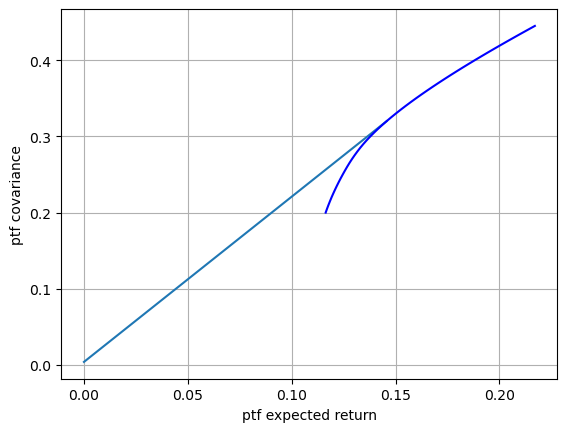

In [16]:
ptf_expected_return = (rf_return * 0.7) + (risky_return * 0.3)
volatility_ptf = (0.3 * standard_deviation)

y = [rf_return, ptf_expected_return, risky_return]
x = [0, volatility_ptf, standard_deviation]
plt.plot(x, y)
plt.plot(expected_return, volatility, color = 'blue')
plt.xlabel('ptf expected return')
plt.ylabel('ptf covariance')
plt.grid(True)
plt.show()

In [17]:
from scipy import optimize

num_assets = len(returns)
rf_return = 0.0040709099998185

def sharpe_ratio(w, ret, rf_ret, cov):
    p_ret = ret.dot(w)
    p_var = np.sqrt(w.T.dot(cov.dot(w)))
    ratio = -(p_ret - rf_ret) / p_var
    return ratio

constraints = ({'type': 'eq', 'fun': sum_weights})
bounds = [(0, 1) for _ in range(num_assets)]
weights = [1./num_assets for _ in range(num_assets)]
opts = minimize(sharpe_ratio, weights, args=(returns, rf_return, covariance),
                bounds=bounds, constraints=constraints)

print(opts)

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -2.17095869780694
       x: [ 8.214e-17  1.968e-01 ...  0.000e+00  0.000e+00]
     nit: 16
     jac: [ 9.851e-01 -2.723e-02 ...  8.025e-01  8.220e-01]
    nfev: 552
    njev: 16


In [18]:
print ("Sharpe ratio: ", -opts.fun)

Sharpe ratio:  2.17095869780694


In [19]:
ptf_return = returns.dot(optimization.x)
ptf_volatility = np.sqrt(optimization.x.T.dot(covariance.dot(optimization.x)))
print(ptf_return)
print(ptf_volatility)

0.4450000000088213
0.21707182336044312


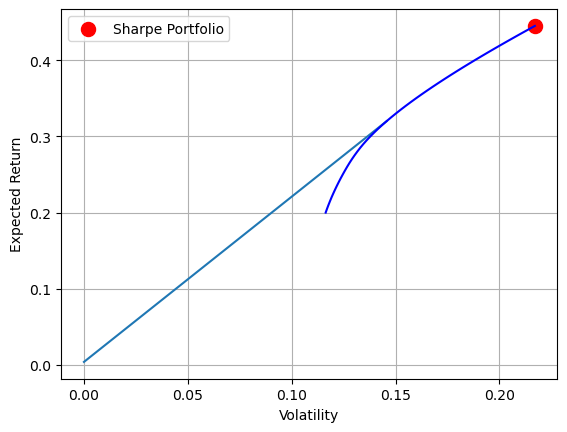

In [20]:
ptf_expected_return = (rf_return * 0.7) + (risky_return * 0.3)
volatility_ptf = (0.3 * standard_deviation)

y = [rf_return, ptf_expected_return, risky_return]
x = [0, volatility_ptf, standard_deviation]
plt.plot(x, y)
plt.plot(expected_return, volatility, color = 'blue')
plt.xlabel('ptf expected return')
plt.ylabel('ptf covariance')

plt.scatter([ptf_volatility], [ptf_return], marker='o', s=102, label = "Sharpe Portfolio", color='red', zorder=1)
plt.xlabel("Volatility")
plt.ylabel("Expected Return")
plt.grid(True)
plt.legend()

plt.show()

CAPM

In [21]:
import pandas as pd

dfc = pd.read_csv('https://raw.githubusercontent.com/matteosan1/finance_course/develop/Projects/proj8.csv', index_col = 'Date')
dfc["SP500ret"] = dfc["SP500"].pct_change()
dfc["NIret"] = dfc["NI"].pct_change()

#print(df.head())
dfc[["SP500ret", "SP500","NIret","NI"]]

,SP500ret,SP500,NIret,NI
Date,,,,
2014-03-27,NaN,1849.040039,NaN,11.095638
2014-03-28,0.004640,1857.619995,-0.000283,11.092502
2014-03-31,0.007924,1872.339966,0.005092,11.148985
2014-04-01,0.007039,1885.520020,0.005348,11.208606
2014-04-02,0.002853,1890.900024,-0.008399,11.114466
...,...,...,...,...
2018-03-20,0.001482,2716.939941,-0.002582,20.734657
2018-03-21,-0.001844,2711.929932,0.004745,20.833052
2018-03-22,-0.025163,2643.689941,0.004294,20.922503


In [22]:
print(dfc.columns)

Index(['AAP', 'ABMD', 'AOS', 'APA', 'ATO', 'CBOE', 'Brent', 'COP', 'CVX',
       'DVA', 'DVN', 'ET', 'FFIV', 'FTI', 'HII', 'HSIC', 'IFF', 'IPGP', 'IRM',
       'IVZ', 'JNPR', 'LNC', 'LPG', 'MOS', 'NCLH', 'NI', 'NOV', 'PRGO', 'PVH',
       'QCOM', 'SEE', 'UNM', 'WU', 'XRAY', 'SP500', 'rf', 'SP500ret', 'NIret'],
      dtype='object')


/var/folders/gz/znzxt8yn1b736qpd82zpbqzw0000gn/T/ipykernel_72582/10175230.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


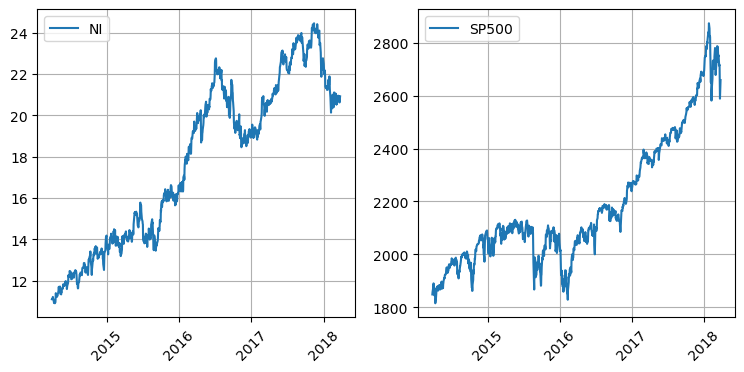

In [23]:
from matplotlib.dates import YearLocator, DateFormatter

fig, ax = plt.subplots(1, 2, figsize=(9, 4))
ax[0].plot(pd.to_datetime(dfc.index), dfc['NI'], label='NI')
ax[0].xaxis.set_major_formatter(DateFormatter('%Y'))
ax[0].xaxis.set_major_locator(YearLocator())
ax[0].tick_params('x', labelrotation=45)
ax[0].legend()
ax[0].grid(True)
ax[1].plot(pd.to_datetime(dfc.index), dfc['SP500'], label='SP500')
ax[1].xaxis.set_major_formatter(DateFormatter('%Y'))
ax[1].xaxis.set_major_locator(YearLocator())
ax[1].tick_params('x', labelrotation=45)
ax[1].legend()
ax[1].grid(True)
fig.show()

In [24]:
import statsmodels.api as sm

capm = dfc.dropna()

y = capm['NIret']
X = sm.add_constant(capm['SP500ret'])

est = sm.OLS(y, X).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                  NIret   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     208.5
Date:                Wed, 13 Sep 2023   Prob (F-statistic):           6.07e-43
Time:                        08:29:03   Log-Likelihood:                 3003.7
No. Observations:                 971   AIC:                            -6003.
Df Residuals:                     969   BIC:                            -5994.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      1.163      0.2

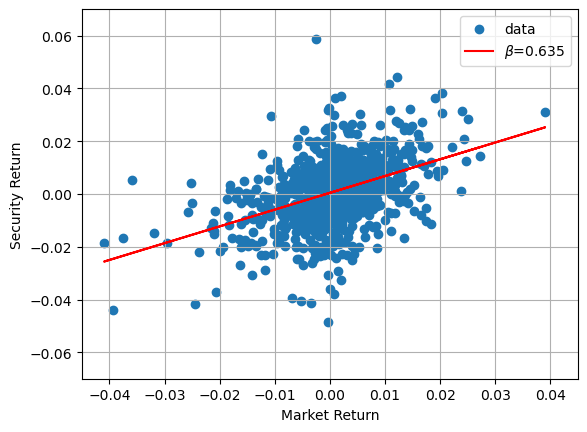

In [25]:
x = capm['SP500ret']
y = capm['NIret']

plt.scatter(capm['SP500ret'], y, label='data')
plt.plot(x, x*est.params[1]+est.params[0], color='red', label=r'$\beta$={:.3f}'.format(est.params[1]))
plt.xlabel("Market Return")
plt.ylabel("Security Return")
plt.grid(True)
plt.xlim(-0.045, 0.045)
plt.ylim(-0.07,0.07)
plt.legend()
plt.show()

MULTIFACTOR MODEL

In [26]:
sp500 = dfc["SP500ret"]
print(sp500.mean())

0.0003928597761047296


In [27]:
dataregression= df
dataregression.drop(['rf'], axis=1, inplace=True,errors='ignore')

returns = dataregression.pct_change()
returns= returns.drop(returns.index[0])
#returns

In [28]:
data_rf = df
daily_returns_rate = data_rf[[data_rf.columns[-1]]]
daily_returns_rate1 = ((1+daily_returns_rate)**(1/252)-1)
daily_returns_rate2= daily_returns_rate1.drop(daily_returns_rate1.index[0])
#print(daily_returns_rate1 )
#print(daily_returns_rate2)

In [29]:
#excess returns
value1 = returns.values
value2 = daily_returns_rate2.values

result = value1 - value2

excess_returns = pd.DataFrame(result, columns=returns.columns)
#excess_returns

In [30]:
mean_columns = excess_returns.mean()
excess_returns_2 = excess_returns.fillna(mean_columns)
# print(excess_returns_2)

In [31]:
#multilinear regressions
res = {}
tickers = list(excess_returns_2.columns)
tickers.remove('SP500')
tickers.remove('Brent')

for t in tickers:
  y = excess_returns_2[t]
  X = excess_returns_2[['SP500','Brent']]
  X = sm.add_constant(X)
  model = sm.OLS(y, X).fit()
  print ("{:.4f}".format((1+model.params[0])**(252)-1))
  print(model.summary())
  res[t] = {'params':model.params, 'pvals':model.pvalues}

-0.6725
                            OLS Regression Results                            
Dep. Variable:                    AAP   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     73.21
Date:                Wed, 13 Sep 2023   Prob (F-statistic):           2.11e-30
Time:                        08:29:11   Log-Likelihood:                 2590.5
No. Observations:                1006   AIC:                            -5175.
Df Residuals:                    1003   BIC:                            -5160.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0044      0.002     -1.912 

In [32]:
print(res)

{'AAP': {'params': const   -0.004420
SP500    0.916689
Brent   -0.051653
dtype: float64, 'pvals': const    5.614659e-02
SP500    4.373834e-31
Brent    4.540465e-02
dtype: float64}, 'ABMD': {'params': const    0.004883
SP500    1.166452
Brent   -0.083451
dtype: float64, 'pvals': const    1.239944e-01
SP500    3.400442e-27
Brent    1.852625e-02
dtype: float64}, 'AOS': {'params': const    0.006439
SP500    1.189920
Brent   -0.004952
dtype: float64, 'pvals': const     6.812356e-07
SP500    1.459479e-127
Brent     7.304236e-01
dtype: float64}, 'APA': {'params': const    0.015971
SP500    1.042870
Brent    0.496925
dtype: float64, 'pvals': const    9.525884e-12
SP500    6.928610e-39
Brent    2.057960e-70
dtype: float64}, 'ATO': {'params': const   -0.014164
SP500    0.568801
Brent   -0.042373
dtype: float64, 'pvals': const    9.517527e-30
SP500    6.252399e-42
Brent    1.745938e-03
dtype: float64}, 'CBOE': {'params': const   -0.015795
SP500    0.541594
Brent   -0.071350
dtype: float64, 'pvals

In [33]:
import yfinance as yf

In [34]:
indexes = ['AAP','ABMD','AOS','APA','ATO','CBOE','COP','CVX','DVA','DVN','ET','FFIV','FTI','HII','HSIC','IFF','IPGP','IRM','IVZ','JNPR','LNC','LPG','MOS','NCLH','NI','NOV','PRGO','PVH','QCOM','SEE','UNM','WU','XRAY']

proxy = yf.Tickers(indexes)
df = proxy.history(start='2014-03-27', end='2018-03-26')

[*********************100%***********************]  33 of 33 completed


In [35]:
tickers_indexes = ['AAP','ABMD','AOS','APA','ATO','CBOE','COP','CVX','DVA','DVN','ET','FFIV','FTI','HII','HSIC','IFF','IPGP','IRM','IVZ','JNPR','LNC','LPG','MOS','NCLH','NI','NOV','PRGO','PVH','QCOM','SEE','UNM','WU','XRAY']
data = yf.download(tickers_indexes, start="2014-07-31", end="2016-02-11")


brent = yf.download('BZ=F', start="2014-07-31", end="2016-02-11")  # correlazione dei rendimenti di ogni singolo tickers con il valore del brent
correlation = data['Close'].corrwith(brent['Close'])
print(correlation)

[*********************100%***********************]  33 of 33 completed
[*********************100%***********************]  1 of 1 completed
AAP    -0.596236
ABMD   -0.822450
AOS    -0.763043
APA     0.944886
ATO    -0.825126
CBOE   -0.809602
COP     0.897579
CVX     0.864528
DVA     0.183663
DVN     0.815511
ET      0.579181
FFIV    0.452167
FTI     0.961632
HII    -0.577466
HSIC   -0.870231
IFF    -0.681801
IPGP   -0.526328
IRM     0.348781
IVZ     0.666390
JNPR   -0.523468
LNC     0.312762
LPG     0.872467
MOS     0.604301
NCLH   -0.752471
NI     -0.785642
NOV     0.935114
PRGO   -0.136554
PVH     0.656641
QCOM    0.792892
SEE    -0.601187
UNM     0.396028
WU     -0.247777
XRAY   -0.776687
dtype: float64


In [36]:
## Riprova

best_10 = correlation.sort_values(ascending=True).head(10)

print(best_10)

HSIC   -0.870231
ATO    -0.825126
ABMD   -0.822450
CBOE   -0.809602
NI     -0.785642
XRAY   -0.776687
AOS    -0.763043
NCLH   -0.752471
IFF    -0.681801
SEE    -0.601187
dtype: float64


- p-value < 0.05, ma con beta = negativo
- p-value > 0.05, ma con beta = positivo
- p-value = 0, ma con beta = negativo
- R^2 < 0.2 li devo scartare  



On the basis of the analyzes carried out, through multilinear regressions based on the excessive returns of each single stock of the Data-frame created, I managed to choose the 10 best stocks that could be more efficient against such a sharp decline of Brent’s value.
First of all, the analysis was performed taking consideration of the R^2 and imposing a greater or equal value that would avoid me discarding the asset (following a general investigation, the minimum value that I identified was 0.2 ). Subsequently, for each regression I assumed the value of the alpha which indicated the performance of the asset and the beta (the latter it had to be negative. The goal was to identify the stocks that had an opposite trend to the Brent, for a purpose of investment protection). Subsequently, for those assets that could not be attributable to a negative correlation with the path of oil (negative beta), my research introduced a further element, namely the p-value. For the latter, the evaluations were carried choosing a p-value that exceeded 0.05 even if with a slightly positive beta, but still close to zero and an alpha and R^2 that met the initially requested implications (an example the QCOM asset was with beta = 0.0027 alpha = 0.0026 p-value = 0.9 and R^2 = 0.248 In conclusion the assets I have chosen are: AOS, FFIV, HTI, IPGP, NCLH, SEE, JNPR, HSIC, XRAY, QCOM.


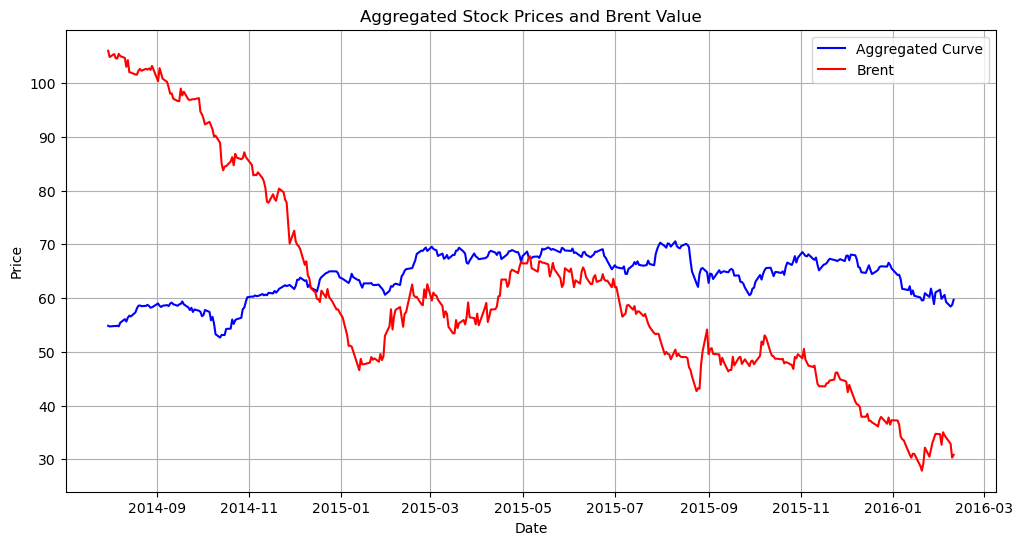

In [64]:
import matplotlib.pyplot as plt

# Lista dei 10 tickers specifici
selected_tickers = ['AOS', 'FFIV', 'HII', 'IPGP', 'NCLH', 'SEE', 'JNPR', 'HSIC', 'XRAY', 'QCOM']

# Calcolare la curva aggregata (media dei prezzi di chiusura) per i tickers selezionati
aggregated_curve = data['Close'][selected_tickers].mean(axis=1)

# Creazione del grafico per la curva aggregata
plt.figure(figsize=(12, 6))
plt.plot(data.index, aggregated_curve, label='Aggregated Curve', color='blue')

# Aggiungi la curva per il valore di Brent
plt.plot(brent.index, brent['Close'], label='Brent', color='red')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Aggregated Stock Prices and Brent Value')
plt.legend()
plt.grid(True)

plt.show()